### **Optimization of classification Models**

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("Endo for ml.csv")
x = df.drop(labels=["D","Geneid"],axis=1)
y = df["D"]


In [4]:
#%reset -f
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import numpy as np
warnings.filterwarnings("ignore")

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0,shuffle=True)

# ***Loading of Data***

### **SUpport Vector machine**

1.   List item
2.   List item



Confusion Matrix is :
[[252 248]
 [ 78 422]]
0.674
Roc_Score: 0.6739999999999999


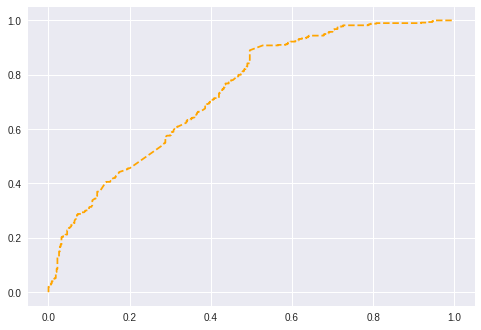

In [6]:
## SVM classifier


from sklearn.svm import SVC
# classifier_SVM = SVC(kernel = 'rbf', random_state = 0, probability = True)
from sklearn.svm import SVC
# ----------------------------------------------------------- #
param_grid = {'C': [0.1, 0.25, 0.5, 0.75, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'auto'],
              'kernel': ['rbf']}
# ----------------------------------------------------------- #
SVM_tu = SVC(probability=True);
classifier_SVM = GridSearchCV(SVM_tu, param_grid, refit=True , cv=5,scoring='accuracy')
classifier_SVM.fit(x_train, y_train)
y_pred = classifier_SVM.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
svm_acc_o = accuracy_score(y_test, y_pred)
svm_prc_o= precision_score(y_test, y_pred)
svm_f1_o = f1_score(y_test, y_pred)
svm_auc_o = roc_auc_score(y_test, y_pred)
fpr_svm_o, tpr_svm_o, thresh_svm_o = roc_curve(y_test, pred_prob[:,1], pos_label=1)
# ploting of AUC - ROC
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_svm_o, tpr_svm_o, linestyle='--',color='orange', label='SVM')
plt.save("plots/SVM_optimized.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

### Decesion Tree

Confusion Matrix is :
[[14  1]
 [ 4  4]]
0.782608695652174
Roc_Score: 0.7166666666666667


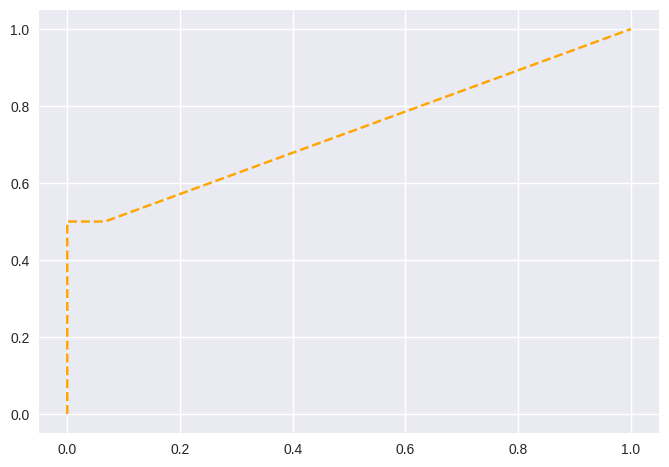

In [ ]:
## Decision Tree classifier


from sklearn.tree import DecisionTreeClassifier
#classifier_DTC = DecisionTreeClassifier(max_depth=3)
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
classifier_DTC = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5,scoring='accuracy',refit=True)
classifier_DTC.fit(x_train, y_train)
y_pred = classifier_DTC.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
dtc_acc_o = accuracy_score(y_test, y_pred)
dtc_prc_o= precision_score(y_test, y_pred)
dtc_f1_o = f1_score(y_test, y_pred)
dtc_auc_o = roc_auc_score(y_test, y_pred)

from sklearn.metrics import roc_curve
pred_prob = classifier_DTC.predict_proba(x_test)
fpr_dtc_o, tpr_dtc_o, thresh_dtc_o = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_dtc_o, tpr_dtc_o, linestyle='--',color='orange', label='DTC')
plt.save("plots/DT_optimized.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

## **MLP**

Confusion Matrix is :
[[11  4]
 [ 2  6]]
0.7391304347826086
Roc_Score: 0.7416666666666667


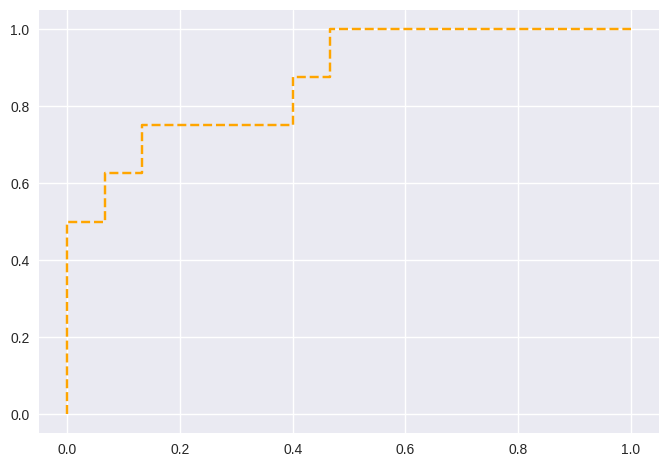

In [ ]:
## MLP Classifier

from sklearn.neural_network import MLPClassifier
#classifier_MLP = MLPClassifier(alpha=1, max_iter=2000, learning_rate='adaptive')
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(50,),(100,),(50,50),(100,100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000]
}
class_MLP = MLPClassifier()
classifier_MLP = GridSearchCV(class_MLP, param_grid, cv=5,scoring='accuracy',refit=True)
classifier_MLP.fit(x_train, y_train)
y_pred = classifier_MLP.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
mlp_acc_o = accuracy_score(y_test, y_pred)
mlp_prc_o= precision_score(y_test, y_pred)
mlp_f1_o = f1_score(y_test, y_pred)
mlp_auc_o = roc_auc_score(y_test, y_pred)
from sklearn.metrics import roc_curve
pred_prob = classifier_MLP.predict_proba(x_test)
fpr_mlp_o, tpr_mlp_o, thresh_mlp_o = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_mlp_o, tpr_mlp_o, linestyle='--',color='orange', label='MLP')
plt.save("plots/MLP_optimized.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

## Gaussian Mixture Model

Confusion Matrix is :
[[14  1]
 [ 2  6]]
0.8695652173913043
Roc_Score: 0.8416666666666667


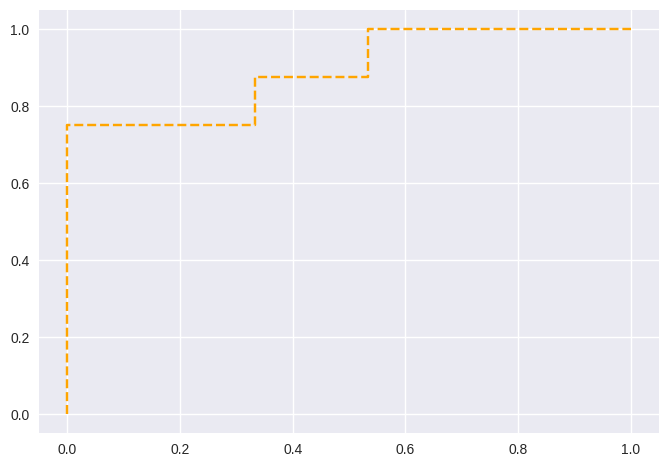

In [ ]:
## Gaussian Process Classifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
#classifier_GPC = GaussianProcessClassifier(1.0 * RBF(1.0))
param_grid = {
    'kernel': [1.0 * RBF(1.0), 1.0 * RBF(0.5)],
    'n_restarts_optimizer': [0, 1, 2]
}
class_GPC = GaussianProcessClassifier()
classifier_GPC = GridSearchCV(class_GPC, param_grid, cv=5,scoring='accuracy',refit=True)
classifier_GPC.fit(x_train, y_train)
y_pred = classifier_GPC.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
gpc_acc_o = accuracy_score(y_test, y_pred)
gpc_prc_o= precision_score(y_test, y_pred)
gpc_f1_o = f1_score(y_test, y_pred)
gpc_auc_o = roc_auc_score(y_test, y_pred)
from sklearn.metrics import roc_curve
pred_prob = classifier_GPC.predict_proba(x_test)
fpr_gpc, tpr_gpc, thresh_gpc = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_gpc, tpr_gpc, linestyle='--',color='orange', label='GPC')
plt.save("plots/GPC_optimized.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

## XGBoost

Confusion Matrix is :
[[13  2]
 [ 2  6]]
0.8260869565217391
Roc_Score: 0.8083333333333333


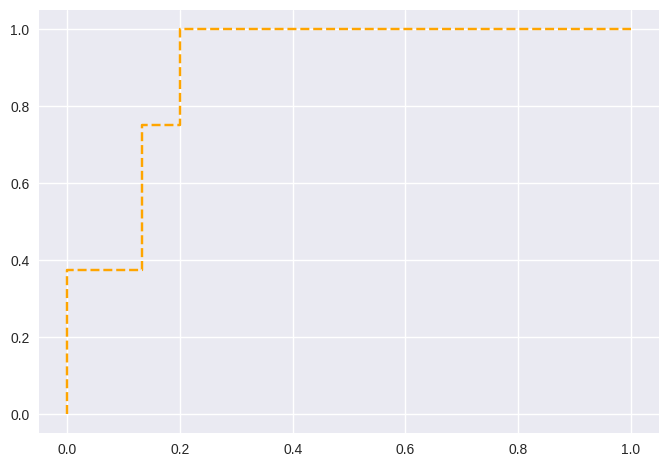

In [ ]:
## XGBoost


from xgboost import XGBClassifier
#classifier_XGB = XGBClassifier(n_estimators=300, learning_rate=0.0001)
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

class_XGB = XGBClassifier()
classifier_XGB = GridSearchCV(class_XGB, param_grid, cv=5,scoring='accuracy',refit=True)
classifier_XGB.fit(x_train, y_train)

y_pred = classifier_XGB.predict(x_test)
predictions = [round(value) for value in y_pred]
from sklearn.metrics import confusion_matrix, accuracy_score
# performace metric
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix is :")
print(cm)
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import roc_curve
pred_prob = classifier_SVM.predict_proba(x_test)
xgb_acc_wo = accuracy_score(y_test, y_pred)
xgb_prc_wo= precision_score(y_test, y_pred)
xbg_f1_wo = f1_score(y_test, y_pred)
xbg_auc_wo = roc_auc_score(y_test, y_pred)
pred_prob = classifier_XGB.predict_proba(x_test)
fpr_xgb_wc, tpr_xgb_wc, thresh_xgb_wc = roc_curve(y_test, pred_prob[:,1], pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr_xgb_wc, tpr_xgb_wc, linestyle='--',color='orange', label='XGB')
plt.save("plots/XGB_optimized.png")
print("Roc_Score:",roc_auc_score(y_test,y_pred))

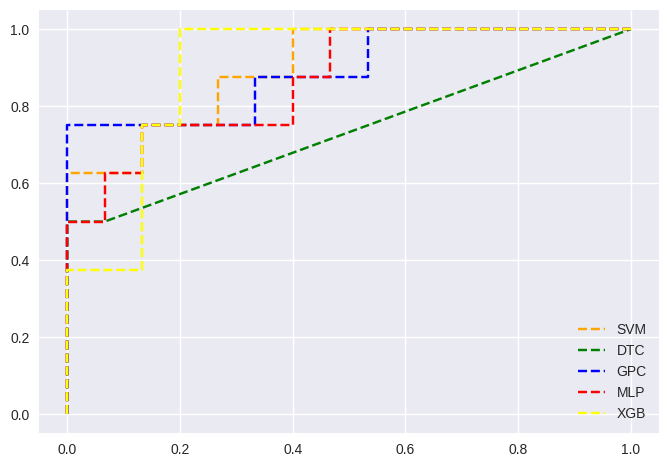

In [ ]:
# Combined ROC

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr_svm_o, tpr_svm_o, linestyle='--',color='orange', label='SVM')
plt.plot(fpr_dtc_o, tpr_dtc_o, linestyle='--',color='green', label='DTC')
plt.plot(fpr_gpc, tpr_gpc, linestyle='--',color='blue', label='GPC')
plt.plot(fpr_mlp_o, tpr_mlp_o, linestyle='--',color='red', label='MLP')
plt.plot(fpr_xgb_wc, tpr_xgb_wc, linestyle='--',color='yellow', label='XGB')
plt.save("plots/cum_optimized.png")
plt.legend()

In [ ]:
models = pd.DataFrame({
    'Model': ['SVC', 'Decision Tree Classifier', 'Gaussian Process Classifier','Multilayer Perceptron','XgBoost'],
    'Accuracy': [svm_acc_o, dtc_acc_o, gpc_acc_o,mlp_acc_o , xgb_acc_wo],
    'Precision': [svm_prc_o, dtc_prc_o, gpc_prc_o,mlp_prc_o , xgb_prc_wo],
    'F1-Score': [svm_f1_o, dtc_f1_o, gpc_f1_o,mlp_f1_o , xbg_f1_wo],
    'AUC': [svm_auc_o, dtc_auc_o, gpc_auc_o,mlp_auc_o , xbg_auc_wo]
})
models.to_csv("metrics/optimized.csv")
print(models)

                         Model  Accuracy  Precision  F1-Score       AUC
0                          SVC  0.826087   0.750000  0.750000  0.808333
1     Decision Tree Classifier  0.782609   0.800000  0.615385  0.716667
2  Gaussian Process Classifier  0.869565   0.857143  0.800000  0.841667
3        Multilayer Perceptron  0.739130   0.600000  0.666667  0.741667
4                      XgBoost  0.826087   0.750000  0.750000  0.808333
